In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as netcdf
import cmocean
import itertools
import math as m

In [2]:
# TSV file name
filename = "pins_REGB.csv"
# initializing the titles and rows list
fields, rows = [], []
df = pd.read_csv(filename, sep="\t")
print(df)

     Wavelength     Pin 1     Pin 2     Pin 3     Pin 4     Pin 5     Pin 6
0    442.311005  0.012474  0.012337  0.000819  0.000394  0.000372  0.000116
1    492.132599  0.021147  0.020888  0.002999  0.002482  0.001798  0.001926
2    558.949890  0.032904  0.031974  0.004469  0.003797  0.001359  0.001883
3    664.937988  0.023212  0.019237  0.003121  0.002822  0.000815  0.000279
4    703.830811  0.019071  0.015250  0.010325  0.011144  0.000730  0.000457
5    739.129028  0.005902  0.005029  0.003364  0.003367  0.000076  0.000234
6    779.723572  0.006110  0.005376  0.002761  0.002624  0.000518  0.000464
7    832.946228  0.005137  0.004452  0.002724  0.002511  0.000278  0.000645
8    863.979614  0.003727  0.002941  0.001747  0.001477  0.000148  0.000396
9   1610.419067  0.001397  0.001669  0.000560  0.000630  0.000918  0.000821
10  2185.698730  0.001152  0.001362  0.000494  0.000601  0.001094  0.000748


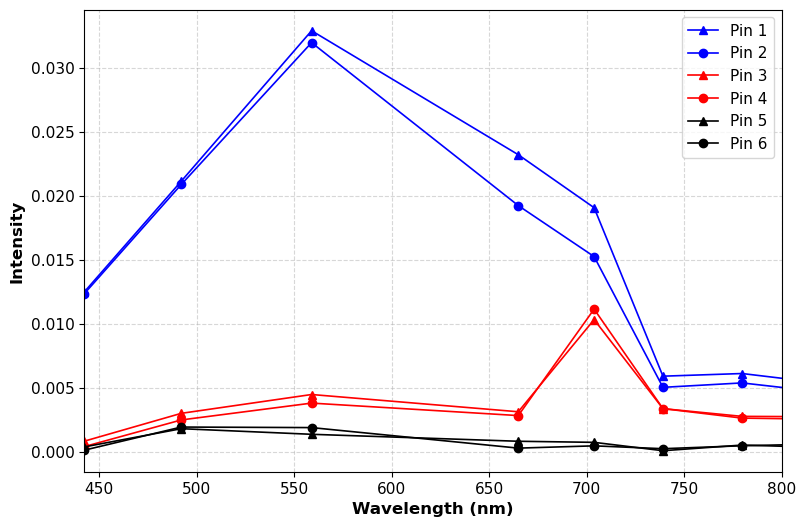

In [3]:
import matplotlib.pyplot as plt
import itertools

# Création d'un cycle de marqueurs
marker = itertools.cycle(('^', 'o', '^', 'o', '^', 'o'))
# Création de la figure avec une taille plus large
plt.figure(figsize=(9, 6), dpi=100)
# Tracé des courbes avec des lignes plus visibles et des marqueurs plus grands
plt.plot(df["Wavelength"], df["Pin 1"], color="b", marker=next(marker), markersize=6, linestyle='-', linewidth=1.2, label="Pin 1")
plt.plot(df["Wavelength"], df["Pin 2"], color="b", marker=next(marker), markersize=6, linestyle='-', linewidth=1.2, label="Pin 2")

plt.plot(df["Wavelength"], df["Pin 3"], color="r", marker=next(marker), markersize=6, linestyle='-', linewidth=1.2, label="Pin 3")
plt.plot(df["Wavelength"], df["Pin 4"], color="r", marker=next(marker), markersize=6, linestyle='-', linewidth=1.2, label="Pin 4")

plt.plot(df["Wavelength"], df["Pin 5"], color="black", marker=next(marker), markersize=6, linestyle='-', linewidth=1.2, label="Pin 5")
plt.plot(df["Wavelength"], df["Pin 6"], color="black", marker=next(marker), markersize=6, linestyle='-', linewidth=1.2, label="Pin 6")
# Labels et titre avec police plus grande
plt.xlabel("Wavelength (nm)", fontsize=12, fontweight='bold')
plt.ylabel("Intensity", fontsize=12, fontweight='bold')
# Optimisation des axes
plt.xlim(df["Wavelength"].min(), 800)  # Garde toute la plage de longueurs d'onde
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Ajout d'une grille plus discrète
plt.grid(True, linestyle="--", alpha=0.5)
# Optimisation de la légende
plt.legend(fontsize=11, loc='upper right', frameon=True)
# Sauvegarde et affichage du graphique
plt.savefig('Report/Figures/Pin_reflect.png', bbox_inches='tight')
plt.show()
plt.close()

**Turbidity**

In [5]:
A=m.pi*2107
C=m.pi/0.2115
R_rs = df.iloc[8 , 1:7]
Turb=(A*R_rs)/(1-(R_rs/C))
print(Turb)

Pin 1    24.673686
Pin 2    19.474109
Pin 3    11.568260
Pin 4     9.780344
Pin 5     0.982609
Pin 6     2.619114
Name: 8, dtype: float64


<>:29: SyntaxWarning: invalid escape sequence '\F'
<>:29: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\3051860399.py:29: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig('Report\Figures\Pin_Turbidity.png', bbox_inches='tight')
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\3051860399.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pins[i], Turb[i] + 0.5, f"{txt:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')


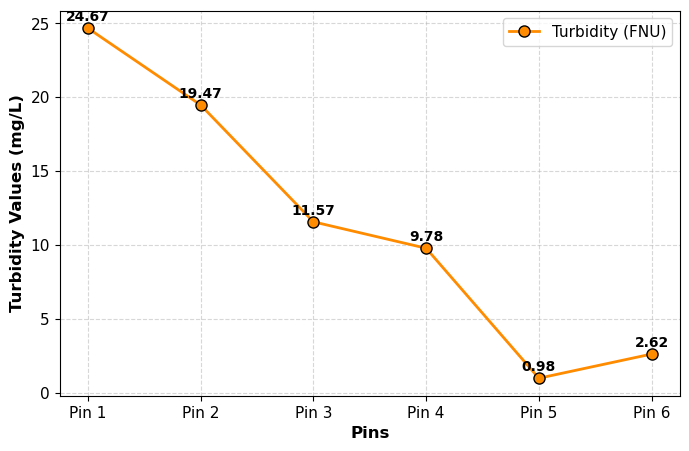

In [6]:
import matplotlib.pyplot as plt
# Données des Pins et valeurs de turbidité
pins = ["Pin 1", "Pin 2", "Pin 3", "Pin 4", "Pin 5", "Pin 6"]

# Création du graphique
plt.figure(figsize=(8, 5), dpi=100)  # Augmenter la taille et la résolution
# Tracé des valeurs avec une ligne plus épaisse et des marqueurs plus visibles
plt.plot(pins, Turb, marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=8, markeredgecolor='black')

# Ajout des valeurs sur les points
for i, txt in enumerate(Turb):
    plt.text(pins[i], Turb[i] + 0.5, f"{txt:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')

# Labels et titre avec une taille plus lisible
plt.xlabel("Pins", fontsize=12, fontweight='bold')
plt.ylabel("Turbidity Values (mg/L)", fontsize=12, fontweight='bold')

# Rotation des noms des Pins si nécessaire
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Ajout de la grille plus subtile
plt.grid(True, linestyle="--", alpha=0.5)

# Légende optimisée placée à l'extérieur
plt.legend(["Turbidity (FNU)"], loc='upper right', fontsize=11, frameon=True)

# Sauvegarde et affichage
plt.savefig('Report\Figures\Pin_Turbidity.png', bbox_inches='tight')
plt.show()
plt.close()


**OC3 method applicated to the 6 pins**

In [8]:
MBR_list = []

# Extract relevant rows for wavelengths 443, 490, 510, and 560 nm
r_443 = df[df['Wavelength'] == 442.3110046386719].iloc[0, 1:].values
r_490 = df[df['Wavelength'] == 492.1325988769531].iloc[0, 1:].values
r_560 = df[df['Wavelength'] == 558.9498901367188].iloc[0, 1:].values

# Calculate MBR for each pin (columns Pin 1, Pin 2, ..., Pin 6)
for i in range(1, 7):
    MBR_list.append(max([r_443[i-1], r_490[i-1]]) / r_560[i-1])
for i, MBR in enumerate(MBR_list):
    print(f"Pin {i+1}'s MBR: {round(MBR, 2)}")
print("")
OC3_chl_a_pin_list = []
coeffs = [0.26294, -2.64669, 1.28364, 1.08209, -1.76828]
for i, mbr in enumerate(MBR_list):
    log_mbr = np.log10(mbr)
    log_chl_a = coeffs[0] + coeffs[1]*log_mbr**1 + coeffs[2]*log_mbr**2 + coeffs[3]*log_mbr**3 
    # log_chl_a = sum(coeffs[i] * (log_mbr ** i) for i in range(len(coeffs)))
    OC3_chl_a_pin_list.append(10**log_chl_a)
    print(f"Pin {i+1}'s Chla concentration: {round(10**log_chl_a,2)} mg/m³")

Pin 1's MBR: 0.64
Pin 2's MBR: 0.65
Pin 3's MBR: 0.67
Pin 4's MBR: 0.65
Pin 5's MBR: 1.32
Pin 6's MBR: 1.02

Pin 1's Chla concentration: 6.47 mg/m³
Pin 2's Chla concentration: 6.16 mg/m³
Pin 3's Chla concentration: 5.68 mg/m³
Pin 4's Chla concentration: 6.15 mg/m³
Pin 5's Chla concentration: 0.92 mg/m³
Pin 6's Chla concentration: 1.73 mg/m³


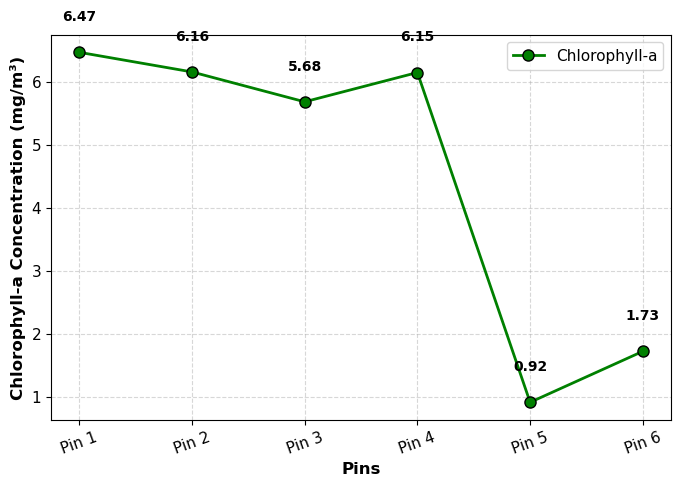

In [9]:
# Labels des pins
pins = ["Pin 1", "Pin 2", "Pin 3", "Pin 4", "Pin 5", "Pin 6"]

# Création du graphique
plt.figure(figsize=(8, 5), dpi=100)

# Tracé des concentrations de chlorophylle-a
plt.plot(pins, OC3_chl_a_pin_list, marker='o', linestyle='-', color='green', linewidth=2, markersize=8, markeredgecolor='black', label="Chlorophyll-a")

# Ajout des valeurs sur les points
for i, chl_a in enumerate(OC3_chl_a_pin_list):
    plt.text(pins[i], chl_a + 0.5, f"{chl_a:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')

# Labels et titre avec une police plus grande
plt.xlabel("Pins", fontsize=12, fontweight='bold')
plt.ylabel("Chlorophyll-a Concentration (mg/m³)", fontsize=12, fontweight='bold')

# Rotation des noms des Pins si nécessaire
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)

# Ajout d'une grille plus subtile
plt.grid(True, linestyle="--", alpha=0.5)

# Légende optimisée placée à l'extérieur
plt.legend(fontsize=11, loc='upper right', frameon=True)

# Sauvegarde et affichage du graphique
plt.savefig('Report/Figures/Pin_Chlorophyll_OC3.png', bbox_inches='tight')
plt.show()
plt.close()


**Red Edge method applicated to the 6 pins**

In [11]:
# Extract relevant rows for wavelength 775 nm
r_775 = df[df['Wavelength'] == 779.7235717773438].iloc[0, 1:].values
r_705 = df[df['Wavelength'] == 703.830810546875].iloc[0, 1:].values
r_665 = df[df['Wavelength'] == 664.93798828125].iloc[0, 1:].values

#variables
bb_list = []
aphy_list = []
chl_a_list = []
red_edge_chla_pin_list=[]
aw705=0.70
aw665=0.40
p=1
a_phy_star_665 = 0.013  # m² (mg Chl)^-1

for i in range(1, 7):
    bb_list.append((1.61*r_775[i-1])/(0.082-(0.6*r_775[i-1])))
for i, bb in enumerate(bb_list):
    print(f"Pin {i+1}'s bb factor: {round(bb, 2)}")
    # Calcul de a_phy(665)
    aphy_value = (r_705[i] / r_665[i]) * (aw705 + bb) - aw665 - (bb ** p)
    aphy_list.append(aphy_value)
for i, aphy in enumerate(aphy_list):
    print(f"Pin {i+1}'s a_phy(665): {round(aphy, 4)}")
for i, aphy in enumerate(aphy_list):
    chl_a_value = aphy / a_phy_star_665
    chl_a_list.append(chl_a_value)

# Affichage des valeurs finales de [chl a]
for i, chl_a in enumerate(chl_a_list):
    print(f"Pin {i+1}'s Chlorophyll-a concentration: {round(chl_a, 4)} mg/m³")

Pin 1's bb factor: 0.13
Pin 2's bb factor: 0.11
Pin 3's bb factor: 0.06
Pin 4's bb factor: 0.05
Pin 5's bb factor: 0.01
Pin 6's bb factor: 0.01
Pin 1's a_phy(665): 0.1527
Pin 2's a_phy(665): 0.1322
Pin 3's a_phy(665): 2.0434
Pin 4's a_phy(665): 2.5191
Pin 5's a_phy(665): 0.226
Pin 6's a_phy(665): 0.7525
Pin 1's Chlorophyll-a concentration: 11.7456 mg/m³
Pin 2's Chlorophyll-a concentration: 10.1659 mg/m³
Pin 3's Chlorophyll-a concentration: 157.1853 mg/m³
Pin 4's Chlorophyll-a concentration: 193.7797 mg/m³
Pin 5's Chlorophyll-a concentration: 17.3862 mg/m³
Pin 6's Chlorophyll-a concentration: 57.8863 mg/m³


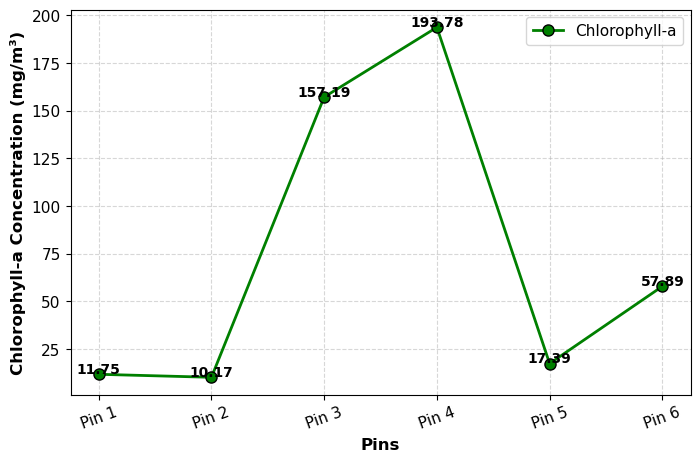

In [12]:
# Labels des pins
pins = ["Pin 1", "Pin 2", "Pin 3", "Pin 4", "Pin 5", "Pin 6"]

# Création du graphique
plt.figure(figsize=(8, 5), dpi=100)

# Tracé des concentrations de chlorophylle-a
plt.plot(pins, chl_a_list, marker='o', linestyle='-', color='green', linewidth=2, markersize=8, markeredgecolor='black', label="Chlorophyll-a")

# Ajout des valeurs sur les points
for i, chl_a in enumerate(chl_a_list):
    plt.text(pins[i], chl_a + 0.5, f"{chl_a:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')

# Labels et titre avec une police plus grande
plt.xlabel("Pins", fontsize=12, fontweight='bold')
plt.ylabel("Chlorophyll-a Concentration (mg/m³)", fontsize=12, fontweight='bold')

# Rotation des noms des Pins si nécessaire
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)

# Ajout d'une grille plus subtile
plt.grid(True, linestyle="--", alpha=0.5)

# Légende optimisée placée à l'extérieur
plt.legend(fontsize=11, loc='upper right', frameon=True)

# Sauvegarde et affichage du graphique
plt.savefig('Report/Figures/Pin_Chlorophyll_RE.png', bbox_inches='tight')
plt.show()
plt.close()


**Map computation : OC3**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as netcdf
import cmocean
import itertools
import math as m

# Définition des coefficients pour le calcul de la chlorophylle
def chlorophyll_concentration(mbr, coefficients = [0.26294 , -2.64669 , 1.28364 , 1.08209 , -1.76828]):
    if type(mbr)==int or type(mbr)==float:
        if mbr <= 0: # Éviter les valeurs négatives ou nulles
            log_chl_a = np.nan
    else:
        mbr[mbr <= 0] =np.nan
        log_mbr = np.log10(mbr)
        log_chl_a = sum(coefficients[i] * (log_mbr ** i) for i in range(len(coefficients)))
    return log_chl_a

# Ouvrir le fichier NetCDF
file2read = netcdf.Dataset('data\Grande_map\S2B_MSIl2grs_20210327T110639_N0209_R137_T30TWS_20210327T122903.nc', 'r')

# Extraire les variables de coordonnées
lat = file2read.variables['lat'][:] # Nom réel peut différer
lon = file2read.variables['lon'][:] # Nom réel peut différer

# Extraire les bandes Rrs
rrs_b1_nc = file2read.variables['Rrs_B1'][:]
rrs_b2_nc = file2read.variables['Rrs_B2'][:]
rrs_b3_nc = file2read.variables['Rrs_B3'][:]

#Masks
rrs_b1_nc[rrs_b1_nc<0]=np.nan
rrs_b2_nc[rrs_b2_nc<0]=np.nan
rrs_b3_nc[rrs_b3_nc<0]=np.nan

# Appliquer un masque si disponible
nvar_flag = file2read.variables['flags'][:]
mask = nvar_flag.copy().astype(np.float32)
mask[mask==393216]=np.nan
mask[mask==393224]=np.nan
rrs_b1_nc[np.isnan(mask)]=np.nan
rrs_b2_nc[np.isnan(mask)]=np.nan
rrs_b3_nc[np.isnan(mask)]=np.nan

# Nettoyer les données pour éviter les erreurs
rrs_b3_nc[rrs_b3_nc <= 0] = np.nan # Éviter les divisions par zéro

# Fermer le fichier NetCDF
file2read.close()

# Calculer le Maximum Band Ratio (MBR)
#max_rrs = np.nanmax ([np.max(rrs_b3_nc), np.max(rrs_b4_nc), np.max(rrs_b5_nc)], axis=0)
max_rrs = np.nanmax(np.array([rrs_b1_nc, rrs_b2_nc]), axis = 0)
mbr = max_rrs / rrs_b3_nc

#chlorophyll_func = np.vectorize(lambda x: chlorophyll_concentration(x, coeffs), otypes =[ float ])
#log_chl_a = chlorophyll_func(mbr)

log_chl_a = chlorophyll_concentration(mbr)
chl_a_OC3 = 10 ** log_chl_a # Convertir en échelle linéaire
# Appliquer le masque pour exclure les régions invalides
chl_a_OC3[np.isnan(mask)] = np.nan

<>:21: SyntaxWarning: invalid escape sequence '\G'
<>:21: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\3667865619.py:21: SyntaxWarning: invalid escape sequence '\G'
  file2read = netcdf.Dataset('data\Grande_map\S2B_MSIl2grs_20210327T110639_N0209_R137_T30TWS_20210327T122903.nc', 'r')
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\3667865619.py:54: RuntimeWarning: All-NaN slice encountered
  max_rrs = np.nanmax(np.array([rrs_b1_nc, rrs_b2_nc]), axis = 0)


In [15]:
# redim_mask = (lon >= -2.4) & (lat >= 46.0)
# chl_a_OC3 = np.where(redim_mask, chl_a_OC3, np.nan)

<>:14: SyntaxWarning: invalid escape sequence '\F'
<>:14: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\4278350606.py:14: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig('Report\Figures\OC3_map.png', bbox_inches='tight')
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\4278350606.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = plt.pcolormesh(lon , lat , chl_a_OC3 , shading='auto', cmap='jet', vmin = 0, vmax = 30)


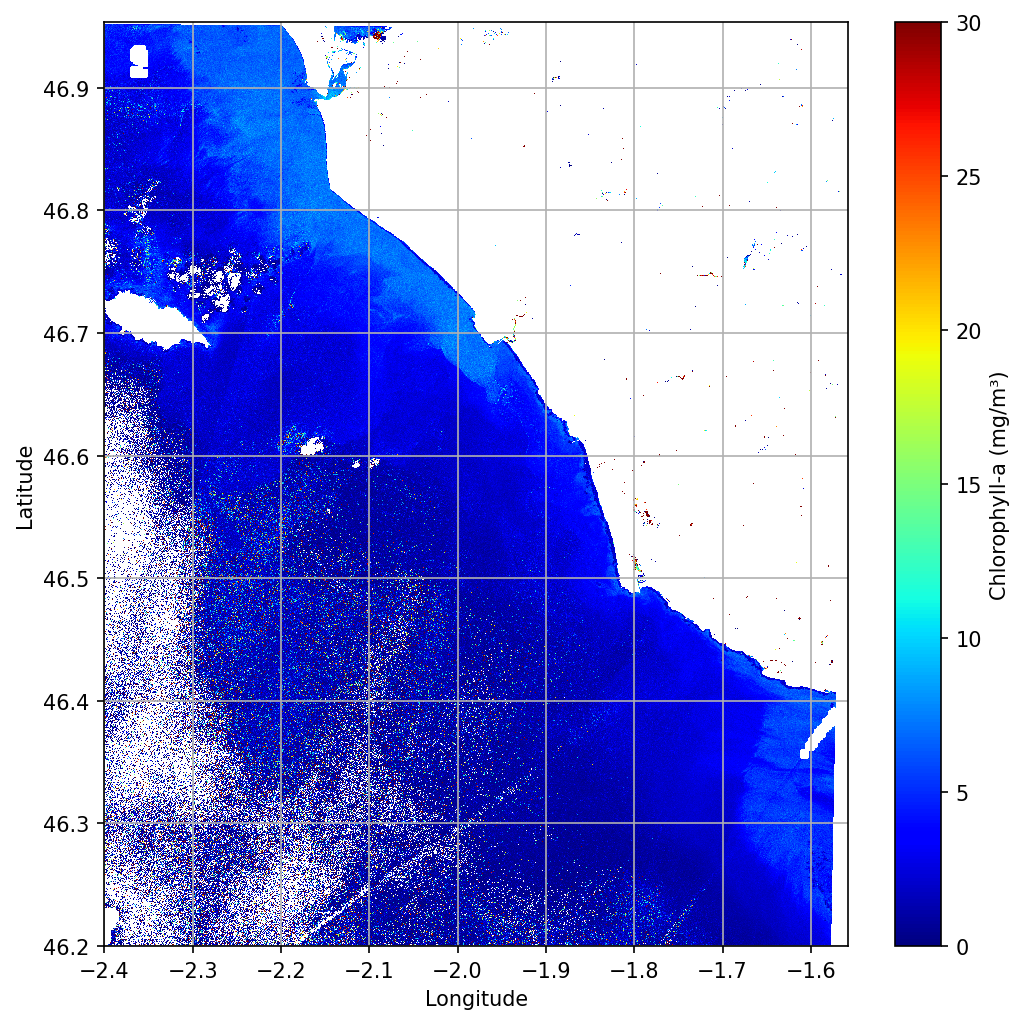

In [16]:
fig = plt.figure(figsize = (8,8),dpi=150)
mesh = plt.pcolormesh(lon , lat , chl_a_OC3 , shading='auto', cmap='jet', vmin = 0, vmax = 30)
plt.colorbar(mesh , label='Chlorophyll-a (mg/m³)')

# Contraindre les axes pour afficher uniquement la zone d’intérêt
plt.xlim(-2.4, lon.max())  # Restreindre la longitude affichée
plt.ylim(46.2, lat.max())  # Restreindre la latitude affichée

# Labels et grille
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig('Report\Figures\OC3_map.png', bbox_inches='tight')
plt.show()
plt.close()

**Map computation : OC4**

Pas possible parce qu'on a pas les bandes nécessaires (il manque la bande à 510nm)

**Map compilation: Red Edge** 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as netcdf
import cmocean
import itertools
import math as m

# Ouvrir le fichier NetCDF
file2read = netcdf.Dataset('data\Grande_map\S2B_MSIl2grs_20210327T110639_N0209_R137_T30TWS_20210327T122903.nc', 'r')

#Bands
# Extraire les bandes Rrs
rrs_b4_nc = file2read.variables['Rrs_B4'][:] 
rrs_b5_nc = file2read.variables['Rrs_B5'][:]
rrs_b7_nc = file2read.variables['Rrs_B7'][:]
lat = file2read.variables['lat'][:]
lon = file2read.variables['lon'][:]
#B7: 775 nm, B5: 705 nm, B4: 665 nm

# Appliquer un masque si disponible
nvar_flag = file2read.variables['flags'][:]
mask = nvar_flag.copy().astype(np.float32)
mask[mask==393216]=np.nan
mask[mask==393224]=np.nan
rrs_b4_nc[np.isnan(mask)]=np.nan
rrs_b5_nc[np.isnan(mask)]=np.nan
rrs_b7_nc[np.isnan(mask)]=np.nan

# Fermer le fichier NetCDF
file2read.close()

#Masks
rrs_b4_nc[rrs_b4_nc<0]=np.nan
rrs_b5_nc[rrs_b5_nc<0]=np.nan
rrs_b7_nc[rrs_b7_nc<0]=np.nan

#Declaration variables
aw705=0.70
aw665=0.40
p_re=1
a_phy_star_665= 0.013  # m² (mg Chl)^-1

# Calcul de bb, aphy et Chla
bb_re = (1.61*rrs_b7_nc) / (0.082 - (0.6 * rrs_b7_nc))
aphy_re = (rrs_b5_nc/ rrs_b4_nc) * (aw705 + bb_re) - aw665 - (bb_re ** p_re)
chl_a_re = aphy_re / a_phy_star_665



<>:10: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\2011870642.py:10: SyntaxWarning: invalid escape sequence '\G'
  file2read = netcdf.Dataset('data\Grande_map\S2B_MSIl2grs_20210327T110639_N0209_R137_T30TWS_20210327T122903.nc', 'r')


In [21]:
#Masks sur le calcul de Chla
chl_a_re[chl_a_re<0]=np.nan
chl_a_re[chl_a_re>30]=np.nan

redim_mask = (lon >= -2.4) & (lat >= 46.2)
chl_a_re = np.where(redim_mask, chl_a_re, np.nan)

<>:14: SyntaxWarning: invalid escape sequence '\F'
<>:14: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\2191378922.py:14: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig('Report\Figures\Red_Edge.png', bbox_inches='tight')
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\2191378922.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = plt.pcolormesh(lon , lat , chl_a_re , shading='auto', cmap='jet')


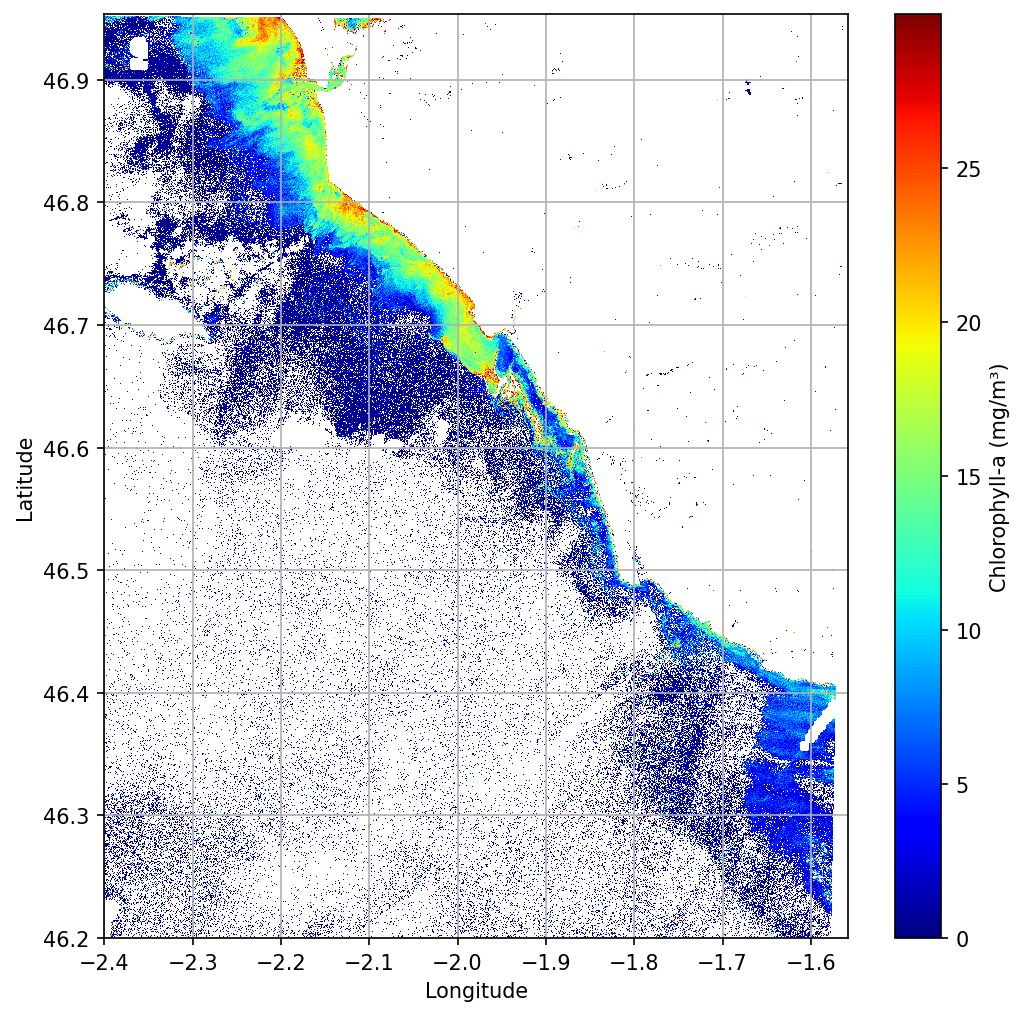

In [22]:
fig = plt.figure(figsize = (8,8),dpi=150)
mesh = plt.pcolormesh(lon , lat , chl_a_re , shading='auto', cmap='jet')
plt.colorbar(mesh , label='Chlorophyll-a (mg/m³)')

# Contraindre les axes pour afficher uniquement la zone d’intérêt
plt.xlim(-2.4, lon.max())  # Restreindre la longitude affichée
plt.ylim(46.2, lat.max())  # Restreindre la latitude affichée

# Labels et grille
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig('Report\Figures\Red_Edge.png', bbox_inches='tight')
plt.show()
plt.close()

**Turbidity Index:**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as netcdf
import cmocean
import itertools
import math as m

In [25]:
# Ouvrir le fichier NetCDF
file2read = netcdf.Dataset('data\Grande_map\S2B_MSIl2grs_20210327T110639_N0209_R137_T30TWS_20210327T122903.nc', 'r')

#Récupérer les données nécessaires:
rrs_b8a_nc = file2read.variables['Rrs_B8A'][:] 
lat = file2read.variables['lat'][:]
lon = file2read.variables['lon'][:]

#Application de masks:
nvar_flag = file2read.variables['flags'][:]
mask = nvar_flag.copy().astype(np.float32)
mask[mask==393216]=np.nan
mask[mask==393224]=np.nan
rrs_b8a_nc[np.isnan(mask)]=np.nan

# Nettoyer les données pour éviter les erreurs
rrs_b8a_nc[rrs_b8a_nc <= 0] = np.nan # Éviter les divisions par zéro

# Fermer le fichier NetCDF
file2read.close()

#Variables à utiliser pour la turbidité
A=m.pi*2107
C=m.pi/0.2115 

#Calcul de la turbidité
Turb_map=(A*rrs_b8a_nc)/(1-(rrs_b8a_nc/C))
#Masks sur le calcul de la turbidité


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\1082114861.py:2: SyntaxWarning: invalid escape sequence '\G'
  file2read = netcdf.Dataset('data\Grande_map\S2B_MSIl2grs_20210327T110639_N0209_R137_T30TWS_20210327T122903.nc', 'r')


In [26]:
Turb_map[Turb_map<0]=np.nan
Turb_map[Turb_map>60]=np.nan
redim_mask = (lon >= -2.4) & (lat >= 46.2)
Turb_map = np.where(redim_mask, Turb_map, np.nan)

<>:15: SyntaxWarning: invalid escape sequence '\F'
<>:15: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\654514581.py:15: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig('Report\Figures\Turbidity_index.png', bbox_inches='tight')
C:\Users\Utilisateur 1\AppData\Local\Temp\ipykernel_51784\654514581.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = plt.pcolormesh(lon , lat , Turb_map , shading='auto', cmap=cmocean.cm.turbid)


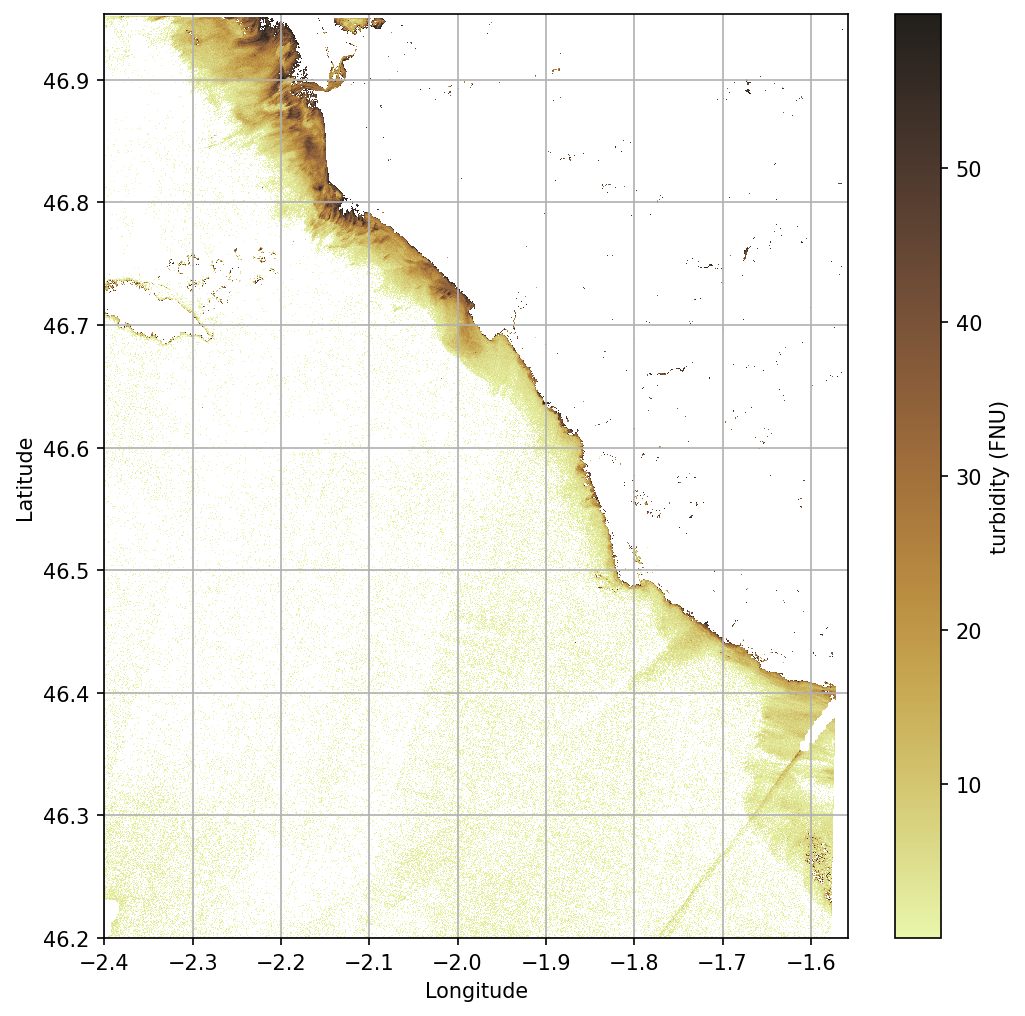

In [27]:
# Création de la figure
fig = plt.figure(figsize = (8,8),dpi=150)
mesh = plt.pcolormesh(lon , lat , Turb_map , shading='auto', cmap=cmocean.cm.turbid)
plt.colorbar(mesh , label='turbidity (FNU)')

# Contraindre les axes pour afficher uniquement la zone d’intérêt
plt.xlim(-2.4, lon.max())  # Restreindre la longitude affichée
plt.ylim(46.2, lat.max())  # Restreindre la latitude affichée

# Labels et grille
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig('Report\Figures\Turbidity_index.png', bbox_inches='tight')
plt.show()
plt.close()